# Why People Really Quit Their Jobs?
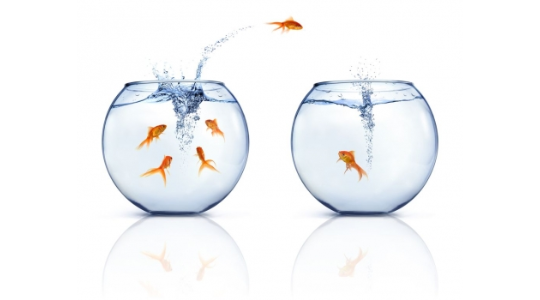


### This dataset is related to the record of the employees in the company.

* It describes the **satisfaction level** of the company,**last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

# 1. Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Load Data

In [31]:
hr=pd.read_csv("data/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 3. Analisys Data and variables

Analize and understand the data in detail in order to make the right assumptions and to choose the right algorithm:

* Size 
* Anlysis of descriptive statistics
* Determine variable's type
* Is there any null value?
* Find and remove duplicates
* Anlysis of descriptive statistics

In [32]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [33]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [34]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


* "Work_accident", "left" and "promotion_last_5years" are _categorical variables_ and not relevant in this descriptive statistics
* "sales" and "salary" as _str_ do not appear above.

In [35]:
hr.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [36]:
#Find and remove duplicates.
len(hr[hr.duplicated]==True)

3008

In [37]:
#I have valorated the size of these elements and I feel confortable removing duplicates from the data set
hr_no_dupl= hr.drop_duplicates()
hr_no_dupl.shape

(11991, 10)

In [38]:
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Which is the turnover ratio in this company after removing duplicates?

In [39]:
people_who_leave=hr_no_dupl[hr_no_dupl.left == 1]
people_who_stay=hr_no_dupl[hr_no_dupl.left == 0]

In [40]:
print(len(people_who_leave)) #number of people who left
print(len(people_who_stay))  #number of people who stay

1991
10000


In [41]:
#turnover ratio:
(len(people_who_leave))/len(hr_no_dupl)*100

16.604119756484028

In [42]:
#or
hr_no_dupl['left'].mean()*100

16.604119756484028

### Could we know which variable has the most influence to stay or leave a job?

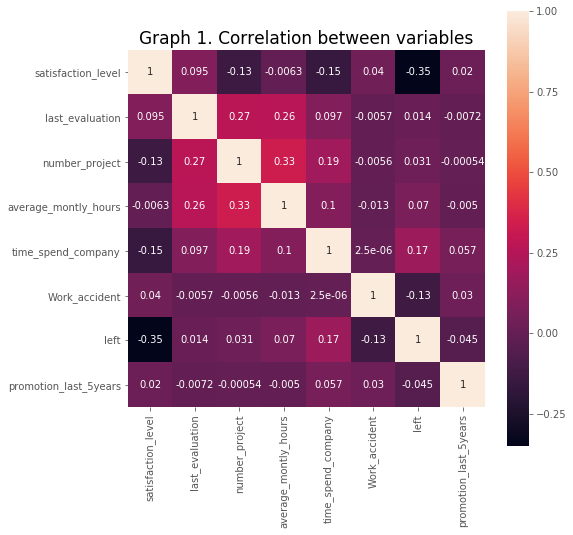

In [43]:
# Correlation heatmap
plt.figure(figsize=(8, 8))  
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 1. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 1:  


####    - As expected,  the "satisfaction level"  has the largest correlation with the decision to stay or leave, but "time_spend_company" and "Work_accident" are also correlationated of the "left" column . 
####    - There is a Pearson's correlation coefficient of -0.15 between "average_montly_hours" and "satisfaction_level" . It seems to indicate that people value enjoy more free time.
####    - However,  it also shows a strong and positive correlation among 'last_evaluation'  with 'number_project' and "average_montly_hours" . It could  indicate that the company recognizes and values their employees' capacity and dedication at work.


# 4. Some Visualitations

### Is salary level a key factor to leave the company?

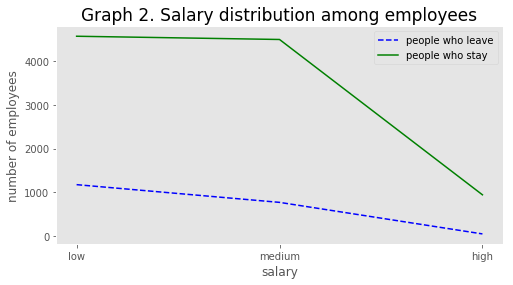

In [51]:
X=hr_no_dupl['salary'].unique()
Y1=people_who_leave.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values
Y2=people_who_stay.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values


plt.figure(figsize=(8,4))
plt.plot(X,Y1,'b--')
plt.plot(X,Y2,c='green')
plt.title("Graph 2. Salary distribution among employees",fontsize = 17)
plt.xlabel(r"salary")
plt.ylabel(r"number of employees")
plt.legend(['people who leave','people who stay'])
plt.grid()
plt.show()

### Does a low employee satisfaction level lead to leave the company?

In [108]:
print('Mean satisfaction of employees is %.f'%(hr_no_dupl.satisfaction_level.mean()*100)) 
print('Mean satisfaction of employees who leave is %.f' %(people_who_leave.satisfaction_level.mean()*100))
print('Mean satisfaction of employees who stay is %.f' %(people_who_stay.satisfaction_level.mean()*100))

Mean satisfaction of employees is 63
Mean satisfaction of employees who leave is 44
Mean satisfaction of employees who stay is 67


(array([ 880.,  429.,  386., 1095., 1242., 1540., 1535., 1718., 1621.,
        1545.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <a list of 10 Patch objects>)

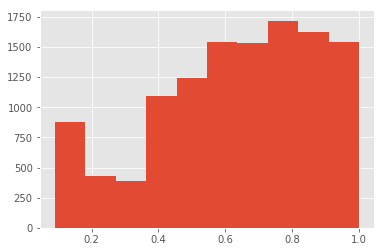

In [113]:
plt.hist(hr_no_dupl.satisfaction_level)

In [598]:
people_who_leave.groupby(['salary','sales'])['salary'].count()

salary  sales      
high    IT               4
        RandD            3
        accounting       3
        hr               3
        management       1
        marketing        3
        product_mng      4
        sales           12
        support          5
        technical       10
low     IT              87
        RandD           51
        accounting      59
        hr              62
        management      32
        marketing       76
        product_mng     59
        sales          319
        support        191
        technical      238
medium  IT              67
        RandD           31
        accounting      47
        hr              48
        management      19
        marketing       33
        product_mng     47
        sales          219
        support        116
        technical      142
Name: salary, dtype: int64

# 5. Data quality issues 

After a quick review of the dataset I realise some issues such that:


* There are some **categorical features (sales and salary)**. To deal better with ML algorithms and stadistic this features must have a NUMERICAL value. 

- **sales** : the name is not relevant to values. It seems to take the name of the category with the largest data values. I will use "department" instead. 
- **time_spend_company** ": the column name doesn't specify the data unit. I will assume "years".
- **left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.

In Sum:

    1.- Rename columns
    2.- Convert to numerical
    3.- Change the position

**1. Rename columns** : "sales" will be "departament" and the word "years" will be included in "time_spend_company"

In [278]:
hr_no_dupl.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [279]:
hr_no_dupl.columns=(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company_years', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'])

In [281]:
hr_no_dupl.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Convert to numerical** : "salary" and "department"

In [282]:
hr_no_dupl['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [283]:
#Dummy Coding
hr_salary = pd.get_dummies(hr_no_dupl['salary'])
hr_salary

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [284]:
#join
hr2=pd.merge(hr_no_dupl,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [286]:
#Now it is the turn of "department" 
hr2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [287]:
hr_department= hr2['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'], 
                                  [0,1,2,3,4,5,6,7,8,9],#new values
                                 inplace = False) #it will be modified in place
hr_department

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
11970    8
11971    1
11972    1
11973    6
11974    6
11975    5
11976    8
11977    8
11978    8
11979    0
11980    0
11981    0
11982    0
11983    0
11984    0
11985    0
11986    6
11987    7
11988    7
11989    7
11990    7
11991    6
11992    6
11993    5
11994    5
11995    5
11996    5
11997    5
11998    8
11999    6
Name: department, Length: 11991, dtype: int64

In [288]:
#finally, we include this values into the dataFrame as "department_numeric" columnn
hr2['department_numeric']=hr_department
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left,promotion_last_5years,department,salary,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,0


In [289]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr2.drop(columns=['department','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,left,promotion_last_5years,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0


**3.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [292]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company_years',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric']

In [293]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company_years',
 'Work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric',
 'left']

In [294]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_years,Work_accident,promotion_last_5years,high,low,medium,department_numeric,left
0,0.38,0.53,2,157,3,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,0,1


In [295]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 12 columns):
satisfaction_level          11991 non-null float64
last_evaluation             11991 non-null float64
number_project              11991 non-null int64
average_montly_hours        11991 non-null int64
time_spend_company_years    11991 non-null int64
Work_accident               11991 non-null int64
promotion_last_5years       11991 non-null int64
high                        11991 non-null uint8
low                         11991 non-null uint8
medium                      11991 non-null uint8
department_numeric          11991 non-null int64
left                        11991 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.3 MB


# 5. Machine Learning

                          satisfaction_level  last_evaluation  number_project  \
satisfaction_level                  1.000000         0.095186       -0.133246   
last_evaluation                     0.095186         1.000000        0.270256   
number_project                     -0.133246         0.270256        1.000000   
average_montly_hours               -0.006252         0.264678        0.331516   
time_spend_company_years           -0.152915         0.096829        0.188837   
Work_accident                       0.039940        -0.005695       -0.005612   
promotion_last_5years               0.019789        -0.007206       -0.000544   
high                                0.017031        -0.017543       -0.002820   
low                                -0.027838         0.010416       -0.000914   
medium                              0.018579        -0.000755        0.002484   
department_numeric                  0.005716         0.009266        0.005870   
left                        

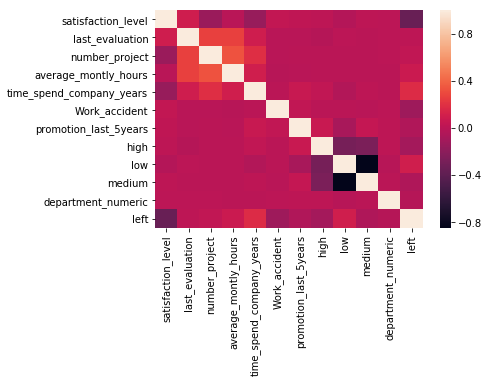

In [298]:
corr = hr_data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()